In [2]:
import os
import errno
import shutil
import pandas as pd
from statistics import mode,mean

IMAGES ='C:/Users/sanja/Desktop/flowerdet/data/train'
DIR = 'C:/Users/sanja/Desktop/flowerdet/data/train1/'

# Classes to be predicted
classes = []
for i in range(1,104):
    classes.append(str(i))

# Make directories
for class_ in classes:
    if not os.path.exists(DIR+class_):
        try:
            os.makedirs(DIR+class_)
        except OSError as e:
            if e.errno != errno.EEXIST:
                raise
# Import training labels
data = pd.read_csv('C:/Users/sanja/Desktop/flowerdet/data/train.csv')


In [29]:

# Moving files in respective directories
for images, labels in zip(data['image_id'], data['category']):
    shutil.move(IMAGES+'/'+str(images)+'.jpg', DIR+str(labels)+'/'+str(images)+'.jpg')

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/sanja/Desktop/flowerdet/data/train/0.jpg'

In [3]:
from fastai import *
from fastai.vision import *
from pathlib import Path
from fastai.callbacks import *

In [3]:
p = Path('C:/Users/sanja/Desktop/flowerdet/data/train1')
for c in classes:
  print(c)
  verify_images(p/c,delete=True,max_size=500)

KeyboardInterrupt: 

In [4]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random
from sklearn.utils import shuffle
from tqdm import tqdm_notebook

In [5]:
df = pd.read_csv('C:/Users/sanja/Desktop/flowerdet/data/train.csv')
df['category'].value_counts()

51    582
77    567
46    441
73    438
89    414
     ... 
21     90
7      90
1      90
27     90
45     90
Name: category, Length: 102, dtype: int64

In [6]:
df.head()

,image_id,category
0,0,77
1,1,81
2,2,52
3,3,72
4,4,58


In [ ]:
path = 'C:/Users/sanja/Desktop/flowerdet/data/train1'

In [ ]:
tfms = get_transforms(do_flip=True,flip_vert=True,max_zoom=1.2,max_warp=0.3,max_lighting=0.3,max_rotate=40.0,p_affine=0.75,p_lighting=0.75)
data = (ImageList.from_folder(path) 
        .split_by_rand_pct()              
        .label_from_folder()            
        .add_test_folder(test_folder = 'C:/Users/sanja/Desktop/flowerdet/data/test')              
        .transform(tfms, size=224)
        .databunch(bs=16,num_workers=20))

In [6]:
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (14832 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
1,1,1,1,1
Path: C:\Users\sanja\Desktop\flowerdet\data\train1;

Valid: LabelList (3708 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
74,46,29,65,97
Path: C:\Users\sanja\Desktop\flowerdet\data\train1;

Test: LabelList (2009 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: EmptyLabelList
,,,,
Path: C:\Users\sanja\Desktop\flowerdet\data\train1

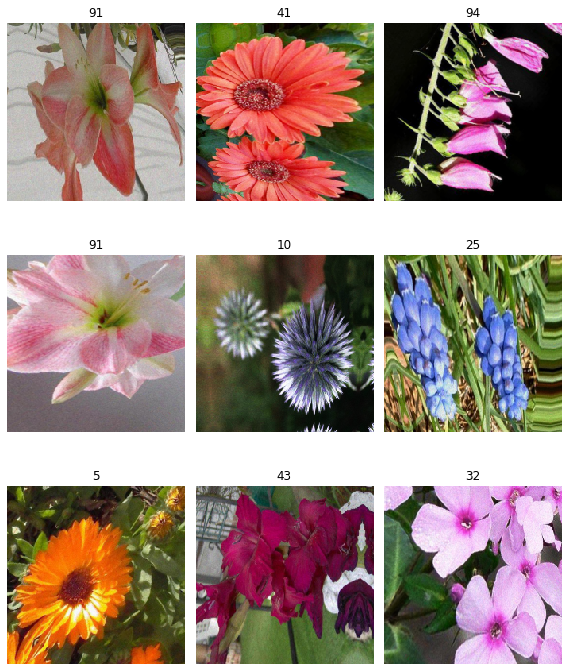

In [10]:
data.show_batch(rows=3, figsize=(8,10))

In [11]:
print(data.classes)

['1', '10', '100', '101', '102', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '6', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '7', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '8', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '9', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99']


In [12]:
learn = cnn_learner(data, models.resnet50, metrics=[accuracy], model_dir="models/")


In [13]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,time
0,0.829433,0.364112,0.900485,05:20
1,0.502837,0.188781,0.942826,05:29
2,0.317895,0.091622,0.971953,05:31
3,0.209430,0.051905,0.985167,05:21
4,0.156573,0.049019,0.985976,05:17


In [14]:
learn.save('resnet-50-stage-1')

In [15]:
interp = ClassificationInterpretation.from_learner(learn) ###interpret results

losses,idxs = interp.top_losses() ###finding which images that caused the most difficult for the model

len(data.valid_ds)==len(losses)==len(idxs)

True

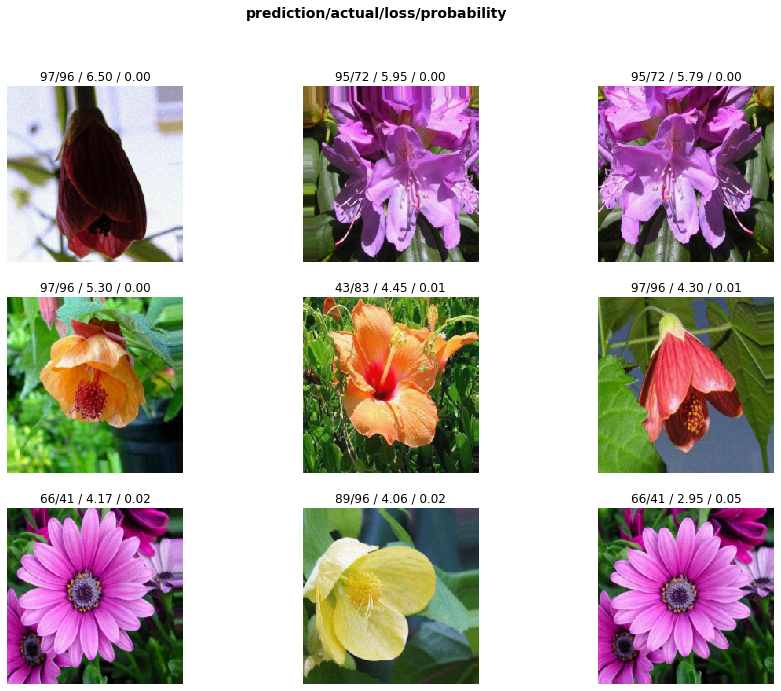

In [16]:
interp.plot_top_losses(9, figsize=(15,11))

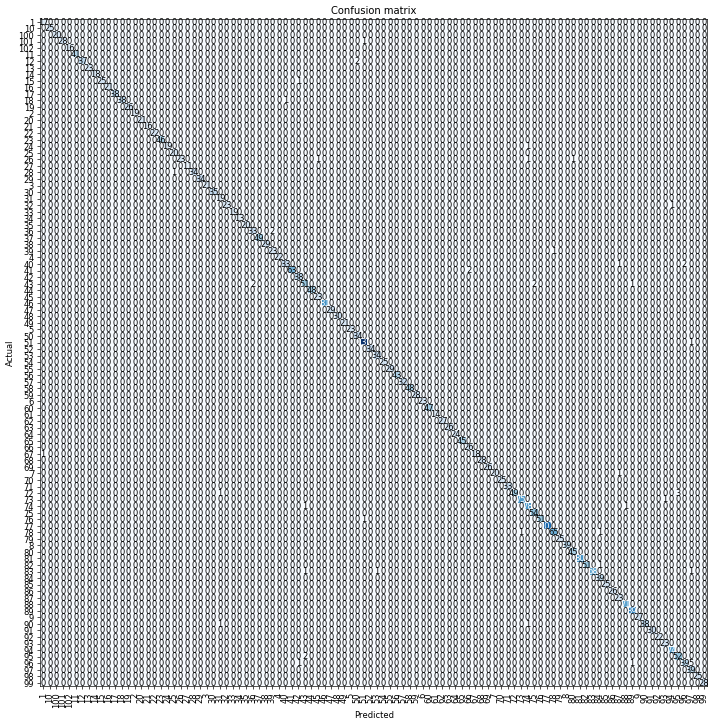

In [17]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [18]:
interp.most_confused()

[('96', '97', 5),
 ('72', '95', 3),
 ('12', '50', 2),
 ('36', '39', 2),
 ('40', '96', 2),
 ('41', '66', 2),
 ('43', '36', 2),
 ('43', '75', 2),
 ('95', '43', 2),
 ('101', '51', 1),
 ('15', '42', 1),
 ('18', '40', 1),
 ('24', '74', 1),
 ('26', '45', 1),
 ('26', '74', 1),
 ('26', '80', 1),
 ('28', '25', 1),
 ('32', '94', 1),
 ('39', '78', 1),
 ('40', '87', 1),
 ('43', '89', 1),
 ('51', '97', 1),
 ('67', '1', 1),
 ('7', '87', 1),
 ('72', '31', 1),
 ('73', '93', 1),
 ('74', '43', 1),
 ('74', '88', 1),
 ('76', '51', 1),
 ('78', '73', 1),
 ('78', '84', 1),
 ('82', '84', 1),
 ('83', '43', 1),
 ('83', '53', 1),
 ('83', '97', 1),
 ('90', '31', 1),
 ('90', '74', 1),
 ('96', '42', 1),
 ('96', '89', 1)]

In [19]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 1.91E-06
Min loss divided by 10: 2.29E-05


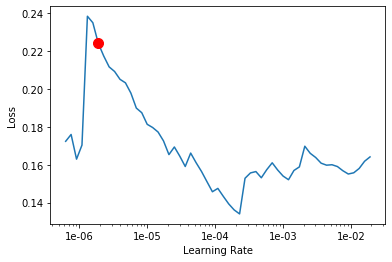

In [20]:
learn.recorder.plot(suggestion=True)

In [21]:
learn.unfreeze()

In [22]:
learn.fit_one_cycle(5, max_lr=1.91E-06)

epoch,train_loss,valid_loss,accuracy,time
0,0.179082,0.045287,0.986246,06:07
1,0.168340,0.040846,0.987594,06:12
2,0.123474,0.035860,0.989213,06:13
3,0.134002,0.034021,0.990291,06:14
4,0.118384,0.033191,0.990831,06:11


In [30]:
learn.save('resnet-50-stage-2')

In [31]:
learn.export()

In [32]:
learn_path = learn.path
print(learn_path)

C:\Users\sanja\Desktop\flowerdet\data\train1


In [33]:
learn = load_learner(learn_path)

In [34]:
test = pd.read_csv('C:/Users/sanja/Desktop/flowerdet/data/test.csv')

In [29]:
test_path = Path('C:/Users/sanja/Desktop/flowerdet/data/test')

In [36]:
images = []
prediction = []
#probability = []
for i in test['image_id']:
  images.append(i)
  link = str(test_path)+'/'+str(i)+'.jpg'
  img = open_image(link)
  pred_class,pred_idx,outputs = learn.predict(img)
  prediction.append(pred_class.obj)
  #probability.append(outputs.abs().max().item())
answer = pd.DataFrame({'image_id':images,'category':prediction})
answer.head()
answer.to_csv('submission_resnet50-norm-base.csv')

In [31]:
path = 'C:/Users/sanja/Desktop/flowerdet/data/train1'

In [37]:
def get_data(sz):
    data = (ImageList.from_folder(path) 
            .split_by_rand_pct()              
            .label_from_folder()            
            .add_test_folder(test_folder = 'C:/Users/sanja/Desktop/flowerdet/data/test')              
            .transform(tfms, size=sz)
            .databunch(bs=16,num_workers=20)).normalize(imagenet_stats)
    return data

In [9]:
learn50 = cnn_learner(get_data(8), models.resnet50, metrics=accuracy,model_dir="models/")
learn50.save('res50_0')

In [10]:
def train_model(sz,i):
    learn50=cnn_learner(get_data(sz),models.resnet50, metrics=[accuracy],model_dir="models/").load('res50_'+str(sz-8))
    print(learn50.path)
    learn50.fit_one_cycle(6*i)
    learn50.recorder.plot()
    learn50.unfreeze()
    learn50.fit_one_cycle(2*i)
    learn50.save('res50_'+str(sz))

In [11]:
train_model(8, 1)

C:\Users\sanja\Desktop\flowerdet\data\train1


epoch,train_loss,valid_loss,accuracy,time


KeyboardInterrupt: 

C:\Users\sanja\Desktop\flowerdet\data\train1


epoch,train_loss,valid_loss,accuracy,time
0,3.579015,3.304362,0.216019,03:21
1,3.398220,3.028478,0.263484,03:15
2,3.193367,2.827090,0.283981,03:12
3,3.113895,2.683460,0.315534,03:14
4,3.010524,2.591731,0.338188,03:21
5,2.911517,2.535499,0.346818,03:19
6,2.865877,2.429299,0.366505,03:13
7,2.758195,2.339431,0.387810,03:11
8,2.625712,2.297199,0.398058,03:19
9,2.713938,2.238848,0.405609,03:20


epoch,train_loss,valid_loss,accuracy,time
0,3.230852,2.811023,0.303398,03:41
1,3.098526,2.705182,0.337379,03:41
2,2.827454,2.470708,0.370280,03:40
3,2.601149,2.241384,0.417476,03:33


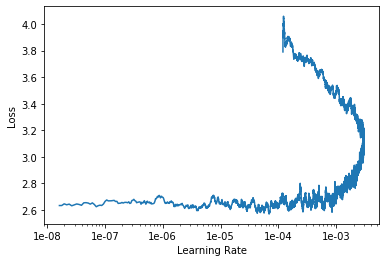

In [86]:
train_model(16,2)

C:\Users\sanja\Desktop\flowerdet\data\train1


epoch,train_loss,valid_loss,accuracy,time
0,3.088708,2.689600,0.345739,03:13
1,3.040302,2.540335,0.384035,03:15
2,2.822840,2.676955,0.407228,03:18
3,2.768506,2.744137,0.436893,03:20
4,2.679626,30.571835,0.454693,03:16
5,2.586513,48.735096,0.474110,03:14
6,2.511041,296.431824,0.475458,03:13
7,2.513118,39.376812,0.484358,03:13
8,2.409809,2.324440,0.505394,03:13
9,2.419307,238.114960,0.525081,03:13


epoch,train_loss,valid_loss,accuracy,time
0,2.544113,85.676971,0.495955,03:33
1,2.651073,2.017534,0.482470,03:32
2,2.449750,2.469351,0.520766,03:33
3,2.088274,1.897305,0.549892,03:34
4,1.949434,6.795220,0.610302,03:34
5,1.835996,9.489460,0.634574,03:35


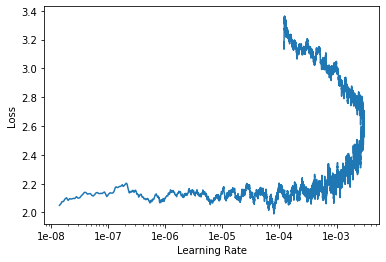

In [88]:
train_model(24,3)

C:\Users\sanja\Desktop\flowerdet\data\train1


epoch,train_loss,valid_loss,accuracy,time
0,2.052546,1.759869,0.604639,04:19
1,1.946132,5.132641,0.607336,04:18
2,1.939505,1.408278,0.631068,04:17
3,1.875389,1.732632,0.622977,04:18
4,1.898503,2.594513,0.626483,04:18
5,1.896246,1.889956,0.629450,04:27
6,1.847134,1.893695,0.630798,04:19
7,1.750260,1.515179,0.651294,04:18
8,1.710380,1.510940,0.643743,04:19
9,1.682164,2.212088,0.650485,04:18


epoch,train_loss,valid_loss,accuracy,time
0,1.598785,1.476202,0.690129,04:51
1,1.989699,1.471790,0.618662,04:51
2,1.966503,1.408928,0.618123,04:54
3,1.787977,1.367255,0.650755,04:53
4,1.560201,1.332380,0.670173,04:55
5,1.386041,0.885549,0.755933,04:54
6,1.201825,0.861071,0.773463,04:52
7,1.268874,0.781946,0.788026,04:53


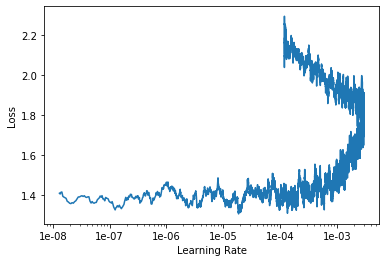

In [89]:
train_model(32,4)

In [22]:
sz = 64; i = 5
learn50 = cnn_learner(get_data(sz), models.resnet50, metrics=[accuracy],model_dir="models/").load('res50_32')
learn50.fit_one_cycle(6*i)
learn50.unfreeze()
learn50.fit_one_cycle(2*i)
learn50.save('res50_'+str(sz))

epoch,train_loss,valid_loss,accuracy,time
0,1.839064,1.257886,0.649137,04:20
1,1.635616,1.040720,0.709277,04:25
2,1.334446,0.840187,0.758630,04:27
3,1.287137,0.754272,0.780475,04:28
4,1.301060,0.693465,0.790992,04:26
5,1.168203,0.654377,0.808522,04:21
6,1.163168,0.668673,0.811219,04:19
7,1.180713,0.633319,0.817692,04:21
8,1.158507,0.604818,0.826591,04:20
9,1.060707,0.581202,0.829558,04:18


epoch,train_loss,valid_loss,accuracy,time
0,0.774975,0.402005,0.884035,04:56
1,0.994247,0.621931,0.817961,04:56
2,1.189220,0.812435,0.773193,04:57
3,1.030762,0.663582,0.807713,04:58
4,0.984609,0.504313,0.848975,04:58
5,0.758765,0.381896,0.879719,04:58
6,0.600022,0.325777,0.902913,04:59
7,0.509620,0.239680,0.924488,04:58
8,0.487903,0.201896,0.937433,04:58
9,0.434193,0.195000,0.938242,04:57


In [25]:
sz = 128; i = 6
learn50 = cnn_learner(get_data(sz), models.resnet50, metrics=[accuracy], callbacks=[SaveModelCallback(learn50, every='improvement', monitor='accuracy', name='best_128')],model_dir="models/").load('res50_64')
learn50.fit_one_cycle(6*i)
learn50.unfreeze()
learn50.fit_one_cycle(2*i)
learn50.save('res50_'+str(sz))

epoch,train_loss,valid_loss,accuracy,time
0,0.890471,0.349319,0.898867,04:27
1,0.757063,0.236710,0.928803,04:28
2,0.614946,0.180478,0.951726,04:32
3,0.534864,0.145495,0.962244,04:31
4,0.492103,0.137172,0.962244,04:30
5,0.425588,0.120449,0.965750,04:30
6,0.468215,0.126001,0.963592,04:32
7,0.436286,0.123390,0.963323,04:32
8,0.474430,0.142892,0.962514,04:32
9,0.438773,0.113611,0.968447,04:32


Better model found at epoch 0 with accuracy value: 0.8824163675308228.


epoch,train_loss,valid_loss,accuracy,time
0,0.239508,0.049098,0.983819,05:22
1,0.439755,0.106001,0.966559,05:26
2,0.547914,0.174288,0.947681,05:25
3,0.606256,0.244070,0.927454,05:31
4,0.518593,0.159820,0.951187,05:29
5,0.532655,0.139547,0.957120,05:39
6,0.326713,0.102931,0.968447,05:56
7,0.247095,0.080924,0.973571,05:32
8,0.209924,0.071354,0.987325,05:39
9,0.104140,0.036126,0.990291,05:28


Better model found at epoch 0 with accuracy value: 0.8824163675308228.


In [32]:
sz = 244; i = 5 #7
learn50 = cnn_learner(get_data(sz), models.resnet50, metrics=[accuracy], callbacks=[SaveModelCallback(learn50, every='improvement', monitor='accuracy', name='best_224')],model_dir="models/").load('res50_128')
learn50.fit_one_cycle(6*i)
learn50.unfreeze()
learn50.fit_one_cycle(2*i)
learn50.save('res50_'+str(sz))

epoch,train_loss,valid_loss,accuracy,time


KeyboardInterrupt: 

In [ ]:
learn50.load('best_244')
test_path = Path('C:/Users/sanja/Desktop/flowerdet/data/test')
test = pd.read_csv('C:/Users/sanja/Desktop/flowerdet/data/test.csv')

images = []
prediction = []
#probability = []
for i in test['image_id']:
  images.append(i)
  link = str(test_path)+'/'+str(i)+'.jpg'
  img = open_image(link)
  pred_class,pred_idx,outputs = learn50.predict(img)
  prediction.append(pred_class.obj)
  #probability.append(outputs.abs().max().item())
answer = pd.DataFrame({'image_id':images,'category':prediction})
answer.head()
answer.to_csv('submission_resnet50-norm-244-2-mix.csv')

In [14]:
final_pred=[]
images=[]
test = pd.read_csv('C:/Users/sanja/Desktop/flowerdet/data/test.csv')
test1=pd.read_csv('C:/Users/sanja/Desktop/flowerdet/submission_densenet1-161orm(2).csv')
test2=pd.read_csv('C:/Users/sanja/Desktop/flowerdet/submission_resnet50-norm-244-pis(2).csv')
test3=pd.read_csv('C:/Users/sanja/Desktop/flowerdet/submission_resnet50-norm-base(2).csv')

test1val=test1['category'].values
test2val=test2['category'].values
test3val=test3['category'].values
t=0
for i in test['image_id']:
    data=([test1val[t],test2val[t],test3val[t]])
    images.append(i)
    try:
        final_pred.append(mode(data))
        
    except:
       final_pred.append(test1val[t])
    t=t+1
answer=pd.DataFrame({'image_id':images,'category':final_pred})
answer.head()
answer.to_csv('ensemble-submission.csv')
    

In [12]:
learn50 = cnn_learner(get_data(8), models.resnet50, metrics=[accuracy],model_dir="models/").mixup()
learn50.save('res50_mixup_0')

In [15]:
def train_model(sz,i):
    learn50=cnn_learner(get_data(sz),models.resnet50, metrics=[accuracy],model_dir="models/").load('res50_mixup_'+str(sz-8)).mixup()
    learn50.fit_one_cycle(6*i)
    learn50.recorder.plot()
    learn50.unfreeze()
    learn50.fit_one_cycle(2*i)
    learn50.save('res50_mixup_'+str(sz))

epoch,train_loss,valid_loss,accuracy,time
0,4.617078,5.087377,0.079288,03:43
1,4.248972,4.546099,0.091424,03:37
2,4.080270,4.025749,0.121359,04:10
3,4.028399,3.712914,0.142395,03:28
4,3.963295,3.754927,0.158306,03:41
5,3.961138,3.641768,0.156958,04:04


epoch,train_loss,valid_loss,accuracy,time
0,4.003012,3.596509,0.151025,03:57
1,3.741466,3.737375,0.214401,03:53


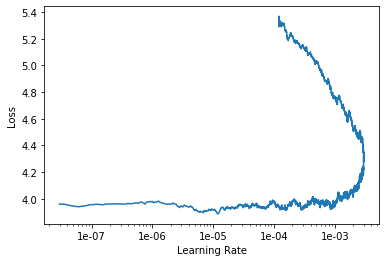

In [16]:
train_model(8,1)

epoch,train_loss,valid_loss,accuracy,time
0,3.895940,3.780063,0.184736,03:38
1,3.772077,6.820248,0.224380,03:31
2,3.736538,3.613060,0.259169,03:21
3,3.652760,10.211438,0.278047,03:29
4,3.602825,10.045605,0.305556,03:32
5,3.499609,14.167813,0.306365,03:51
6,3.444758,15.077319,0.340076,03:11
7,3.424573,11.689463,0.345739,03:26
8,3.372972,4.711768,0.364078,03:27
9,3.286656,3.410853,0.376753,03:23


epoch,train_loss,valid_loss,accuracy,time
0,3.595322,75.054192,0.257821,03:36
1,3.659161,5.860312,0.305016,03:36
2,3.428634,38.098007,0.361920,03:36
3,3.224503,65.298775,0.396980,03:40


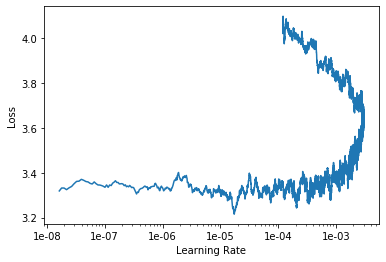

In [18]:
train_model(16,2)

epoch,train_loss,valid_loss,accuracy,time
0,3.536564,885.128052,0.300431,03:20
1,3.470847,144.747620,0.320658,03:21
2,3.421270,243.131546,0.355987,03:19
3,3.405000,141.040039,0.365965,03:17
4,3.331247,25.914618,0.383495,03:18
5,3.284309,210.109528,0.388350,03:17
6,3.149839,15.263810,0.418015,03:18
7,3.168563,26.868719,0.429072,03:18
8,3.074717,9.403227,0.456850,03:16
9,3.052902,5.976452,0.445523,03:16


epoch,train_loss,valid_loss,accuracy,time
0,3.007483,4.817498,0.459008,03:50
1,3.067544,4.991247,0.306095,03:45
2,3.036570,4.749321,0.462783,03:42
3,2.873454,69.398041,0.505124,03:58
4,2.635531,40.364979,0.563646,03:45
5,2.681200,33.459545,0.563916,03:41


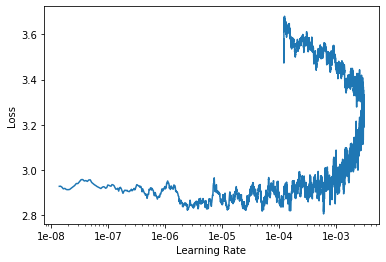

In [19]:
train_model(24,3) 

epoch,train_loss,valid_loss,accuracy,time
0,2.838292,65.450638,0.547735,04:17
1,2.787761,32.609428,0.572276,04:14
2,2.732854,15.752642,0.590345,04:24
3,2.776527,11.947687,0.594121,04:21
4,2.731713,10.252058,0.595469,04:22
5,2.682282,3.412722,0.597087,04:24
6,2.708786,4.185012,0.597357,04:23
7,2.659747,2.614531,0.611381,04:22
8,2.628198,4.876717,0.623247,04:21
9,2.668225,8.369078,0.582794,04:21


epoch,train_loss,valid_loss,accuracy,time
0,2.442503,3.523748,0.650485,04:55
1,2.763684,1.940790,0.607336,04:57
2,2.746226,2.158721,0.592503,04:56
3,2.665623,1.589882,0.588727,04:55
4,2.473611,1.229391,0.687702,04:57
5,2.358035,1.034215,0.732201,04:56
6,2.279474,0.952646,0.751888,04:55
7,2.261789,0.954001,0.760518,04:56


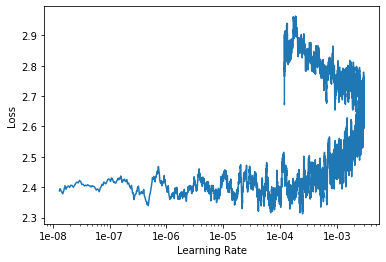

In [21]:
train_model(32,4)

epoch,train_loss,valid_loss,accuracy,time
0,2.699667,1.455442,0.620820,04:21
1,2.517031,1.215641,0.676645,04:25
2,2.339261,1.066041,0.712783,04:32
3,2.363134,0.964827,0.746764,04:43
4,2.290675,0.927429,0.754045,04:37
5,2.274084,0.876415,0.766990,04:39
6,2.205066,0.837833,0.778587,04:43
7,2.214990,0.802263,0.793959,04:57
8,2.221752,0.796389,0.794229,04:57
9,2.199799,0.746771,0.802050,04:56


Better model found at epoch 0 with accuracy value: 0.6318770051002502.


epoch,train_loss,valid_loss,accuracy,time
0,1.961602,0.573796,0.860302,05:05
1,2.099447,0.780322,0.790992,05:26
2,2.160620,0.824834,0.784250,05:25
3,2.111300,0.738097,0.798274,05:09
4,2.018025,0.615921,0.839806,05:11
5,1.895256,0.530101,0.871899,05:04
6,1.803892,0.424248,0.897789,05:09
7,1.699888,0.379072,0.913970,05:39
8,1.624507,0.356240,0.922060,05:28
9,1.648431,0.345803,0.921251,05:10


Better model found at epoch 0 with accuracy value: 0.6318770051002502.


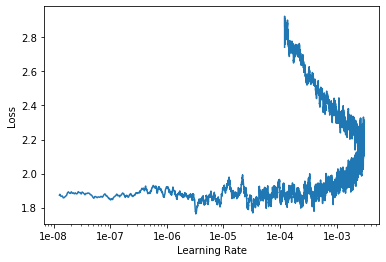

In [25]:
sz=64; i=5
learn50=cnn_learner(get_data(sz),models.resnet50, metrics=[accuracy],callbacks=[SaveModelCallback(learn50, every='improvement', monitor='accuracy', name='best_64_mixup')],model_dir="models/").load('res50_mixup_'+str(32)).mixup()
learn50.fit_one_cycle(6*i)
learn50.recorder.plot()
learn50.unfreeze()
learn50.fit_one_cycle(2*i)
learn50.save('res50_mixup_'+str(sz))

epoch,train_loss,valid_loss,accuracy,time
0,2.014118,0.563196,0.866235,04:53
1,1.846694,0.404943,0.908306,04:45
2,1.760650,0.335734,0.929612,04:42
3,1.663719,0.303005,0.941478,04:57
4,1.649552,0.285199,0.944444,04:59
5,1.667940,0.270193,0.940939,04:58
6,1.713201,0.276235,0.942287,04:53
7,1.742296,0.272909,0.942017,04:44
8,1.654755,0.255845,0.947950,04:42
9,1.650802,0.253942,0.947141,04:42


Better model found at epoch 0 with accuracy value: 0.861920177936554.


epoch,train_loss,valid_loss,accuracy,time
0,1.502812,0.178006,0.964132,05:21
1,1.631837,0.331340,0.918015,05:22
2,1.723918,0.355869,0.917745,05:49
3,1.642425,0.318116,0.926375,05:26
4,1.547953,0.249973,0.948490,05:14
5,1.541661,0.189177,0.964132,05:12
6,1.434059,0.156491,0.974919,05:10
7,1.335105,0.133185,0.980043,05:06
8,1.340602,0.126657,0.980043,05:04
9,1.315329,0.122296,0.982740,05:04


Better model found at epoch 0 with accuracy value: 0.861920177936554.


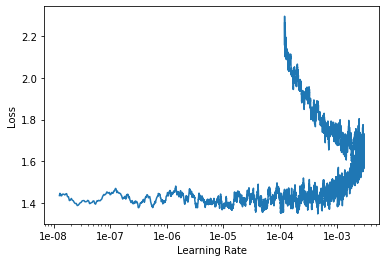

In [27]:
sz=128; i=5
learn50=cnn_learner(get_data(sz),models.resnet50, metrics=[accuracy],callbacks=[SaveModelCallback(learn50, every='improvement', monitor='accuracy', name='best_128_mixup')],model_dir="models/").load('res50_mixup_'+str(64)).mixup()
learn50.fit_one_cycle(6*i)
learn50.recorder.plot()
learn50.unfreeze()
learn50.fit_one_cycle(2*i)
learn50.save('res50_mixup_'+str(sz))

epoch,train_loss,valid_loss,accuracy,time
0,1.573530,0.226159,0.965210,05:56
1,1.422641,0.157441,0.974919,06:03
2,1.426597,0.123560,0.981122,05:50
3,1.389376,0.113249,0.984897,05:51
4,1.361396,0.100280,0.985976,05:46
5,1.382553,0.094211,0.988403,05:55
6,1.417472,0.091603,0.990022,06:11
7,1.337991,0.096377,0.988943,06:02
8,1.374479,0.103588,0.987864,05:59
9,1.348667,0.098742,0.985976,05:54


epoch,train_loss,valid_loss,accuracy,time
0,1.189556,0.059908,0.997573,07:37
1,1.236899,0.080737,0.988943,07:35
2,1.441032,0.141873,0.972762,07:29
3,1.421394,0.174159,0.967098,07:33
4,1.432085,0.245581,0.968447,07:49
5,1.439356,0.177742,0.967368,07:38
6,1.406658,0.115537,0.984628,07:19
7,1.314240,0.108078,0.988403,07:19
8,1.323928,0.080810,0.991370,07:19
9,1.195239,0.059672,0.993258,07:25


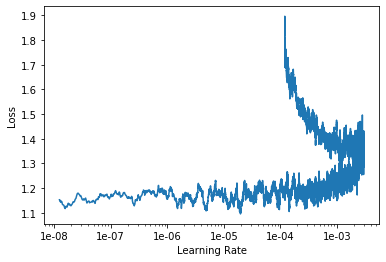

In [38]:
sz=244; i=7
learn50=cnn_learner(get_data(sz),models.resnet50, metrics=[accuracy],callbacks=[SaveModelCallback(learn50, every='improvement', monitor='accuracy', name='best_244_mixup')],model_dir="models/").load('res50_mixup_'+str(128)).mixup()
learn50.fit_one_cycle(6*i)
learn50.recorder.plot()
learn50.unfreeze()
learn50.fit_one_cycle(2*i)
learn50.save('res50_mixup_'+str(sz))

In [39]:
learn50.load('res50_mixup_244')
test_path = Path('C:/Users/sanja/Desktop/flowerdet/data/test')
test = pd.read_csv('C:/Users/sanja/Desktop/flowerdet/data/test.csv')

images = []
prediction = []
#probability = []
for i in test['image_id']:
  images.append(i)
  link = str(test_path)+'/'+str(i)+'.jpg'
  img = open_image(link)
  pred_class,pred_idx,outputs = learn50.predict(img)
  prediction.append(pred_class.obj)
  #probability.append(outputs.abs().max().item())
answer = pd.DataFrame({'image_id':images,'category':prediction})
answer.head()
answer.to_csv('submission_resnet50-norm-244-1-mixup.csv')

In [15]:

final_pred=[]
images=[]
test = pd.read_csv('C:/Users/sanja/Desktop/flowerdet/data/test.csv')
test1=pd.read_csv('C:/Users/sanja/Desktop/flowerdet/submission_densenet1-161orm(2).csv')
test2=pd.read_csv('C:/Users/sanja/Desktop/flowerdet/submission_resnet50-norm-244-pis(2).csv')
test3=pd.read_csv('C:/Users/sanja/Desktop/flowerdet/submission_resnet50-norm-base(2).csv')
test4=pd.read_csv('C:/Users/sanja/Desktop/flowerdet/submission_resnet50-norm-244-1-mixup.csv')
default=pd.read_csv('C:/Users/sanja/Desktop/flowerdet/ensemble-submission(89).csv')
test1val=test1['category'].values
test2val=test2['category'].values
test3val=test3['category'].values
test4val=test4['category'].values
defaultval=default['category'].values
t=0
for i in test['image_id']:
    data=([test1val[t],test2val[t],test3val[t],test4val[t],defaultval[t]])
    images.append(i)
    try:
        final_pred.append(mode(data))
    except:
        final_pred.append(defaultval[t])
    t=t+1
answer=pd.DataFrame({'image_id':images,'category':final_pred})
answer.head()
answer.to_csv('ensemble-submission-2.csv')